# India's Covid-19 Data Analysis

### Data from - https://www.kaggle.com/soham1024/covid-19-india-visualization-forecasting/?select=train.csv#data
## Import the libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

##  Load DataSet

In [83]:
data = pd.read_csv("Dataset/Covid-india/covid_19_india.csv")
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


## EDA (Exploratory Data Analysis)

In [84]:
# Number of row and column in  the dataset

print(" Number of row in the dataset are :", data.shape[0])
print(" Number of column in the dataset are :", data.shape[1])

 Number of row in the dataset are : 7086
 Number of column in the dataset are : 9


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7086 entries, 0 to 7085
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       7086 non-null   int64 
 1   Date                      7086 non-null   object
 2   Time                      7086 non-null   object
 3   State/UnionTerritory      7086 non-null   object
 4   ConfirmedIndianNational   7086 non-null   object
 5   ConfirmedForeignNational  7086 non-null   object
 6   Cured                     7086 non-null   int64 
 7   Deaths                    7086 non-null   int64 
 8   Confirmed                 7086 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 498.4+ KB


In [86]:
# dataset describe (Mean, 25th quartile, 50th quartile, 75th quartile, min, max, standard deviation)

data.describe()

,Sno,Cured,Deaths,Confirmed
count,7086.000000,7.086000e+03,7086.000000,7.086000e+03
mean,3543.500000,3.423502e+04,836.188682,4.534495e+04
std,2045.696336,9.913313e+04,2997.188810,1.263801e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,1772.250000,3.800000e+01,1.000000,1.660000e+02
50%,3543.500000,1.499500e+03,22.000000,2.774000e+03
75%,5314.750000,1.664325e+04,396.000000,2.573375e+04
max,7086.000000,1.179726e+06,38717.000000,1.465911e+06


In [87]:
# check weather dataset contain any null values

data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [88]:
# To check the dataset contain any duplicates values

print("Number of duplicate value in the dataset are :", sum(data.duplicated()))

Number of duplicate value in the dataset are : 0


In [89]:
# Remove the unneccesary column in the dataset

data_new = data.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational','Sno','Time'], axis = 1)

data_new.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


In [90]:
data_new.tail(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7076,07/10/20,Puducherry,24614,546,29682
7077,07/10/20,Punjab,104355,3679,120016
7078,07/10/20,Rajasthan,125448,1574,148316
7079,07/10/20,Sikkim,2587,49,3216
7080,07/10/20,Tamil Nadu,575212,9917,630408
7081,07/10/20,Telengana,177008,1189,204748
7082,07/10/20,Tripura,22623,301,27545
7083,07/10/20,Uttarakhand,43238,677,52329
7084,07/10/20,Uttar Pradesh,370753,6153,420937
7085,07/10/20,West Bengal,243743,5318,277049


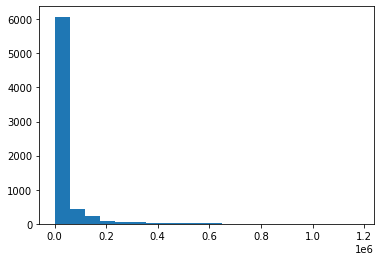

In [91]:
plt.hist(data_new['Cured'], bins=20)
plt.show()

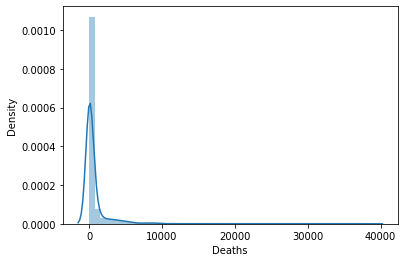

In [92]:
sns.distplot(data_new['Deaths'])
data_new['Deaths'].describe()
plt.show()

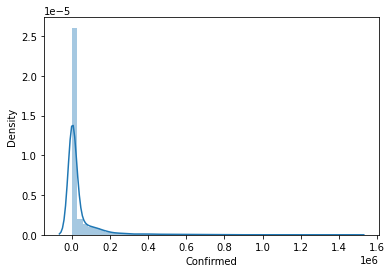

In [93]:
sns.distplot(data_new['Confirmed'])
data_new['Confirmed'].describe()
plt.show()

In [94]:
# select the data of date 07/10/20

covid_new = data_new[data_new['Date'] == '07/10/20']
covid_new.sort_values('Confirmed',ascending=False)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7070,07/10/20,Maharashtra,1179726,38717,1465911
7052,07/10/20,Andhra Pradesh,672479,6052,729307
7066,07/10/20,Karnataka,533074,9461,657705
7080,07/10/20,Tamil Nadu,575212,9917,630408
7084,07/10/20,Uttar Pradesh,370753,6153,420937
7059,07/10/20,Delhi,266935,5581,295236
7085,07/10/20,West Bengal,243743,5318,277049
7067,07/10/20,Kerala,154092,884,242799
7075,07/10/20,Odisha,210217,940,238003
7081,07/10/20,Telengana,177008,1189,204748


In [96]:
# stacked bar chart

# subset columns
temp = data_new[['Date', 'Cured', 'Deaths', 'Confirmed']]

# melt data
temp = temp.melt(value_vars=['Cured', 'Deaths', 'Confirmed'],
                 id_vars="Date", var_name='Case', value_name='Count')
temp.head()

# plot
fig_2 = px.bar(temp, x="Date", y="Count", color='Case', 
               title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig_2.show()

### Q1) Which state has most number of Confirmed Cases, Cured Cases and Death Cases ?

#### Which state has most number of Confirmed Cases?

In [73]:
state_cases = data.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max()

state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = (100*state_cases["Deaths"]/state_cases["Confirmed"])
state_cases["Cure Rate (per 100)"] = (100*state_cases["Cured"]/state_cases["Confirmed"])
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Reds',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Greens',subset=["Cure Rate (per 100)"])



,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
State/UnionTerritory,,,,,,
Maharashtra,1465911,38717,1179726,247468,2.641156,80.477328
Andhra Pradesh,729307,6052,672479,50776,0.829829,92.207945
Karnataka,657705,9461,533074,115170,1.438487,81.050623
Tamil Nadu,630408,9917,575212,45279,1.573108,91.244400
Uttar Pradesh,420937,6153,370753,44031,1.461739,88.078026
Delhi,295236,5581,266935,22720,1.890352,90.414109
West Bengal,277049,5318,243743,27988,1.919516,87.978300
Kerala,242799,884,154092,87823,0.364087,63.464841
Odisha,238003,940,210217,26846,0.394953,88.325357


<AxesSubplot:xlabel='State/UnionTerritory'>

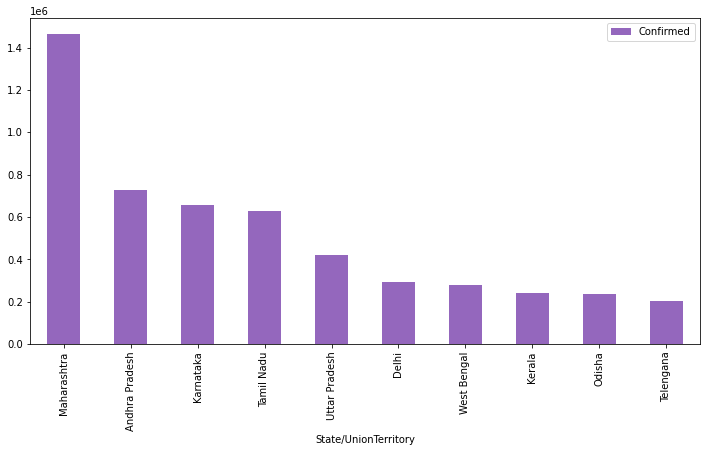

In [100]:
# plot the bar graph of top 10 state with most number of confirmed cases on 07/10/20

covid_new.sort_values(by="Confirmed", ascending=False)[:10].plot(x='State/UnionTerritory',y='Confirmed',kind='bar',  
                                                                 color= 'tab:purple',figsize=(12,6))


## till 07/10/2020
## Maharashtra has most number of confirmed cases 14,659,11


#### Which state has most number of Deaths Cases?

In [101]:
# sort the dataset of top 10 state with most Death cases on 07/10/20

covid_new.sort_values(by="Deaths", ascending=False)[:10]


,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7070,07/10/20,Maharashtra,1179726,38717,1465911
7080,07/10/20,Tamil Nadu,575212,9917,630408
7066,07/10/20,Karnataka,533074,9461,657705
7084,07/10/20,Uttar Pradesh,370753,6153,420937
7052,07/10/20,Andhra Pradesh,672479,6052,729307
7059,07/10/20,Delhi,266935,5581,295236
7085,07/10/20,West Bengal,243743,5318,277049
7077,07/10/20,Punjab,104355,3679,120016
7061,07/10/20,Gujarat,125111,3519,145200
7069,07/10/20,Madhya Pradesh,118039,2488,138668


<AxesSubplot:xlabel='State/UnionTerritory'>

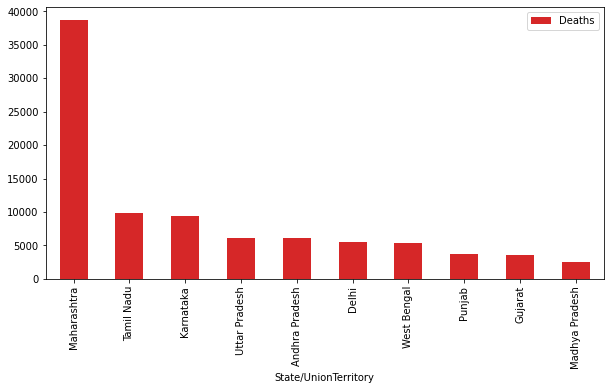

In [102]:
# plot the bar graph of top 10 state with most number of Deaths cases on 07/10/20

covid_new.sort_values(by="Deaths", ascending=False)[:10].plot(x='State/UnionTerritory',y='Deaths',
                                                              kind='bar', color= 'tab:red', figsize=(10,5))


## Till 07/10/2020

## Maharashtra has most number of Deaths cases 38717


#### Which state has most number of Cured Cases?

In [103]:
# sort the dataset of top 10 state with most number of recovery on 07/10/20

covid_new.sort_values(by="Cured", ascending=False)[:10]

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7070,07/10/20,Maharashtra,1179726,38717,1465911
7052,07/10/20,Andhra Pradesh,672479,6052,729307
7080,07/10/20,Tamil Nadu,575212,9917,630408
7066,07/10/20,Karnataka,533074,9461,657705
7084,07/10/20,Uttar Pradesh,370753,6153,420937
7059,07/10/20,Delhi,266935,5581,295236
7085,07/10/20,West Bengal,243743,5318,277049
7075,07/10/20,Odisha,210217,940,238003
7055,07/10/20,Bihar,178395,925,190740
7081,07/10/20,Telengana,177008,1189,204748


<AxesSubplot:xlabel='State/UnionTerritory'>

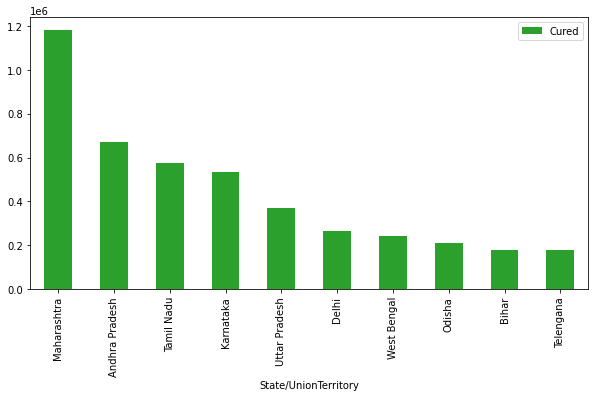

In [104]:
# plot the bar graph of top 10 state with most number of Confirmed cases on 07/10/20

covid_new.sort_values(by="Cured", ascending=False)[:10].plot(x='State/UnionTerritory',y='Cured',
                                                             kind='bar', color= 'tab:green' ,figsize=(10,5))


##  Till 13/07/2020
## Maharashtra has most number of Cured cases 1179726

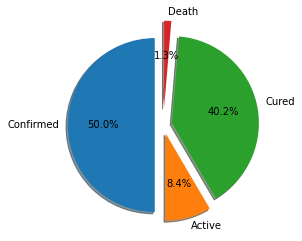

In [106]:
labels=['Confirmed','Active','Cured','Death']
values=[1465911,247468,1179726,38717]

import matplotlib.pyplot as plt
explode=(0.10,0.10,0.1,0.2)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [107]:
pd.DataFrame(data_new).to_csv('Covid_india_new.csv')

In [108]:
data_new.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3


<AxesSubplot:>

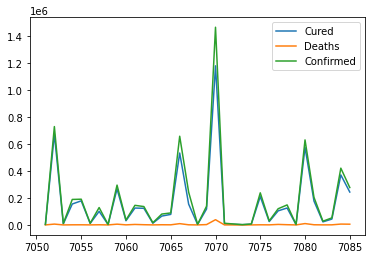

In [109]:
covid_new.plot()

In [111]:
covid_new.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
7051,07/10/20,Andaman and Nicobar Islands,3678,54,3912
7052,07/10/20,Andhra Pradesh,672479,6052,729307
7053,07/10/20,Arunachal Pradesh,7965,20,11007
7054,07/10/20,Assam,155077,778,188902
7055,07/10/20,Bihar,178395,925,190740


In [65]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [112]:
# color pallette
cnf = '#9467bd' # confirmed - purple
dth = '#ff2e63' # death - red
rec = '#2ca02c' # recovered - green
act = '#fe9801' # active case - yellow

In [113]:
def plot_data(col, hue):
    fig = px.bar(data_new, x="Date", y=col, title=col, 
                 color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [81]:
plot_data('Cured', dth)

<AxesSubplot:>

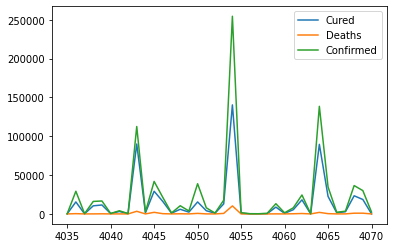

In [58]:
data1_new.plot()

<AxesSubplot:>

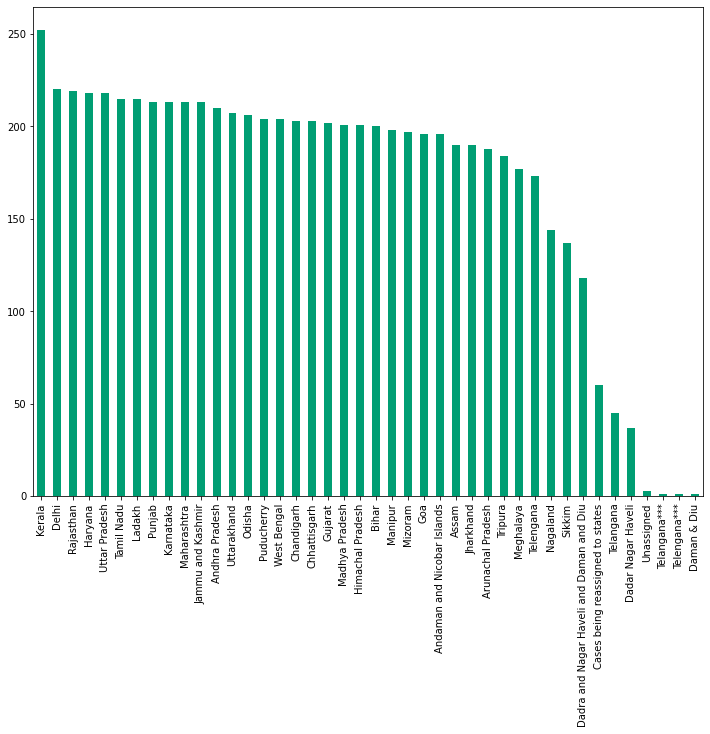

In [115]:
plt.figure(figsize=(12,9))

data_new['State/UnionTerritory'].value_counts().plot.bar(color=u'#009E73')

### Label Encoding

In [116]:
from sklearn.preprocessing import LabelEncoder
var=['State/UnionTerritory']
labelencoder = LabelEncoder()
for i in var:
    data_new[i] = labelencoder.fit_transform(data_new[i])
data_new.dtypes 

Date                    object
State/UnionTerritory     int32
Cured                    int64
Deaths                   int64
Confirmed                int64
dtype: object

In [117]:
a=data_new[['State/UnionTerritory','Cured','Deaths','Confirmed']]

### Scalling , Fit and Transform Process 

In [118]:
from sklearn.preprocessing import StandardScaler
X = a
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X

array([[-0.07080861, -0.34536823, -0.27901068, -0.35881545],
       [-0.07080861, -0.34536823, -0.27901068, -0.35881545],
       [-0.07080861, -0.34536823, -0.27901068, -0.35880753],
       ...,
       [ 1.72788469,  0.0908235 , -0.05311641,  0.05526616],
       [ 1.64223263,  3.3948462 ,  1.77405791,  2.97213268],
       [ 1.81353675,  2.11354939,  1.49544386,  1.83351906]])

### Model Selection 

In [119]:
model = KMeans(n_clusters=3,random_state=11)
model.fit(X)

KMeans(n_clusters=3, random_state=11)

In [120]:
a["labels"] = model.labels_

In [127]:
a.head()

,State/UnionTerritory,Cured,Deaths,Confirmed,labels,y
0,19,0,0,1,2,2
1,19,0,0,1,2,2
2,19,0,0,2,2,2
3,19,0,0,3,2,2
4,19,0,0,3,2,2


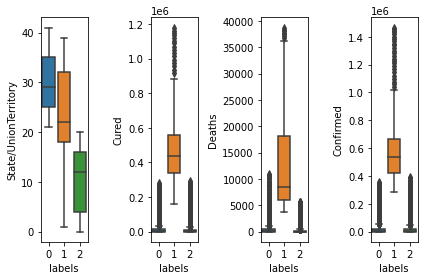

In [122]:
import seaborn as sns
f, axes = plt.subplots(1,4)
sns.boxplot(data=a,x="labels",y="State/UnionTerritory",ax=axes[0])
sns.boxplot(data=a,x="labels",y="Cured",ax=axes[1])
sns.boxplot(data=a,x="labels",y="Deaths",ax=axes[2])
sns.boxplot(data=a,x="labels",y="Confirmed",ax=axes[3])
plt.tight_layout()

### Elbow for KMeans clustering
### Finding K - Value

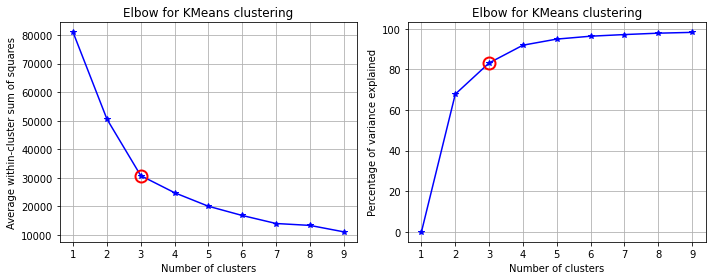

In [123]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,10)
KM = [KMeans(n_clusters=k).fit(a) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(a, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/a.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(a)**2)/a.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

kIdx = 10-1
##### plot ###
kIdx = 2

# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

In [124]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
a['y'] = y_pred

print(y_pred)

[2 2 2 ... 0 1 0]


### The silhouette plot for the various clusters

For n_clusters = 2 The average silhouette_score is : 0.7998679977031001
For n_clusters = 3 The average silhouette_score is : 0.4590588364992915
For n_clusters = 4 The average silhouette_score is : 0.4786174636155185
For n_clusters = 5 The average silhouette_score is : 0.49372377057496036
For n_clusters = 6 The average silhouette_score is : 0.45581370921248593


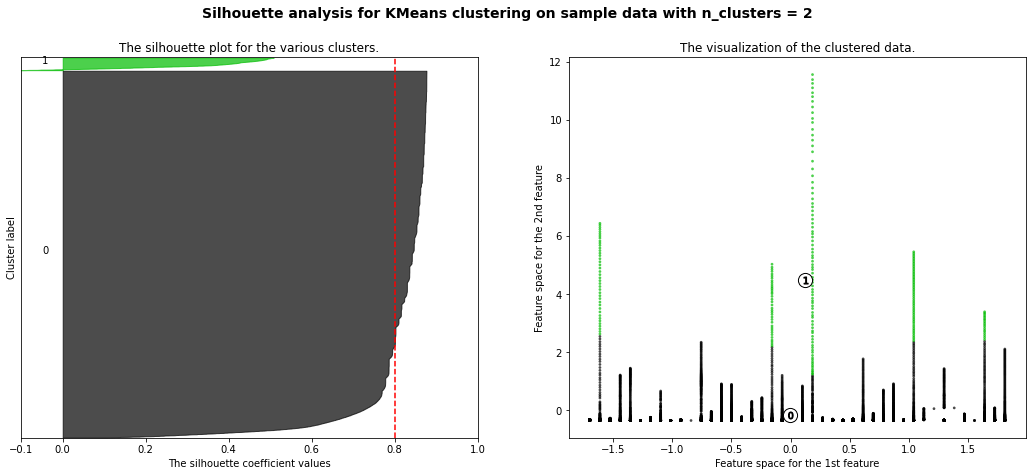

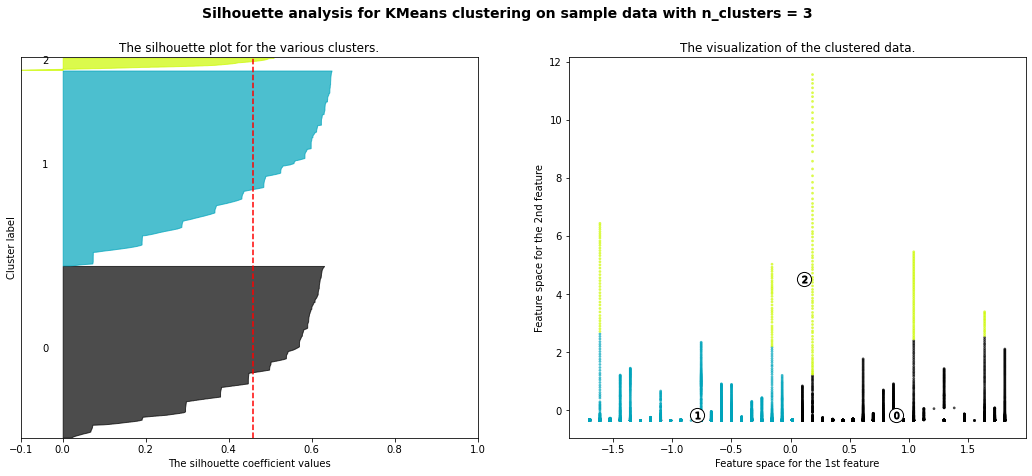

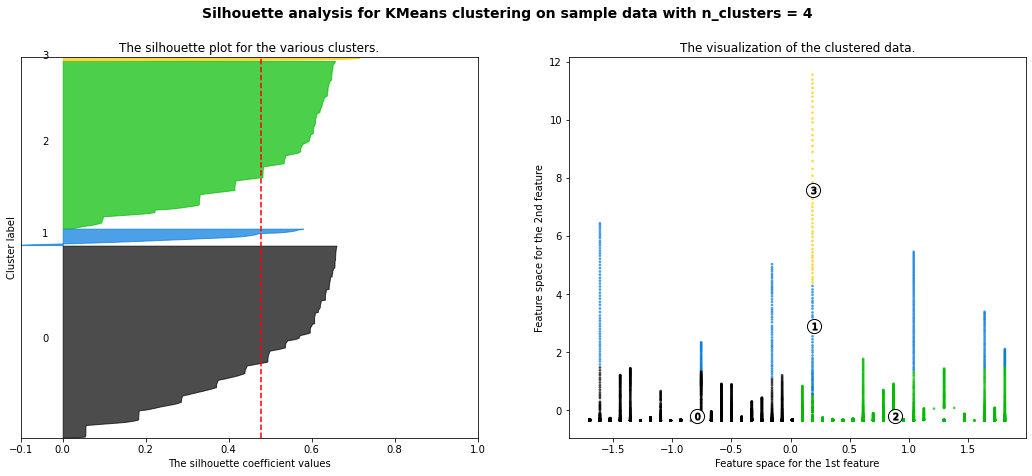

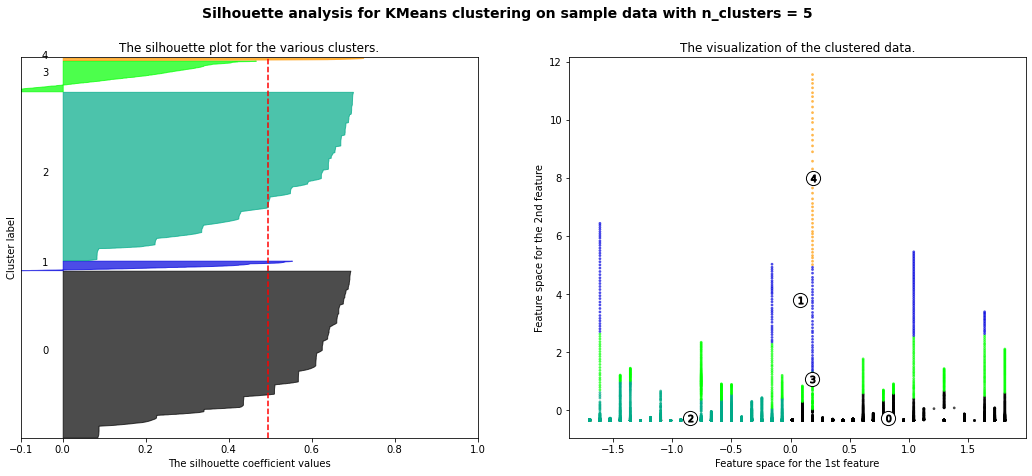

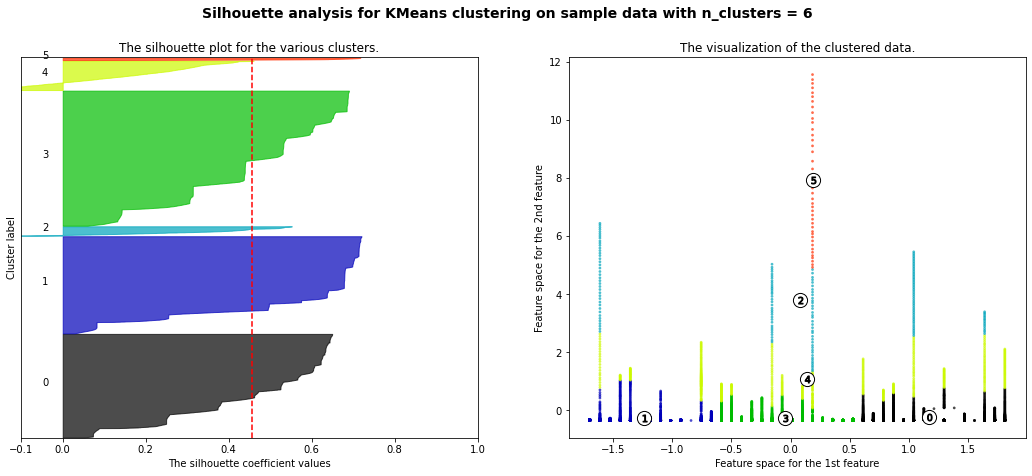

In [125]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    import matplotlib.cm as cm
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()